In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

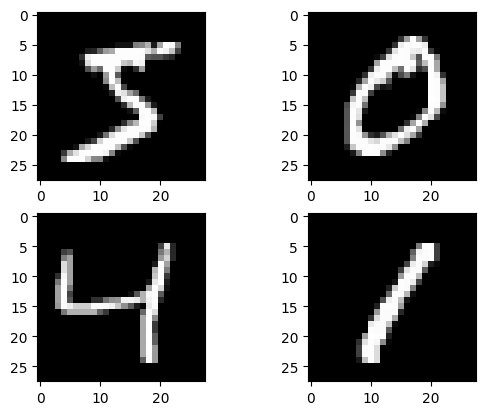

In [3]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

def flatten_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    # Normalize and flatten images
    x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
    x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
    # One-hot encode labels
    encoder = OneHotEncoder(sparse_output=False)
    y_train = encoder.fit_transform(y_train.reshape(-1, 1))
    y_test = encoder.transform(y_test.reshape(-1, 1))
    return x_train, y_train, x_test, y_test

# Functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# NeuralNetwork
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.random.randn(1, hidden_size) * 0.01
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.random.randn(1, output_size) * 0.01
        self.learning_rate = learning_rate

    def forward(self, X):
        self.Y1 = np.dot(X, self.W1) + self.b1
        self.A1 = sigmoid(self.Y1)
        self.Y2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = softmax(self.Y2)
        return self.A2

    def backward(self, X, y, output):
        m = X.shape[0]
        dY2 = output - y
        dW2 = np.dot(self.A1.T, dY2) / m
        db2 = np.sum(dY2, axis=0, keepdims=True) / m

        dY1 = np.dot(dY2, self.W2.T) * sigmoid_derivative(self.Y1)
        dW1 = np.dot(X.T, dY1) / m
        db1 = np.sum(dY1, axis=0, keepdims=True) / m

        # Update W and b
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self, X, y, epochs=20, batch_size=64):
        for epoch in range(epochs):
            for i in range(0, X.shape[0], batch_size):
                X_batch = X[i:i + batch_size]
                y_batch = y[i:i + batch_size]
                output = self.forward(X_batch)
                self.backward(X_batch, y_batch, output)

            # Loss
            output = self.forward(X)
            loss = -np.sum(y * np.log(output + 1e-8)) / X.shape[0]
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

# Load flatten MNIST data
x_train, y_train, x_test, y_test = flatten_data()

# Train
nn = NeuralNetwork(input_size=28 * 28, hidden_size=256, output_size=10, learning_rate=0.1)
nn.train(x_train, y_train, epochs=20, batch_size=64)

# Test
y_pred = nn.predict(x_test)
y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/20, Loss: 0.4876
Epoch 2/20, Loss: 0.3605
Epoch 3/20, Loss: 0.3195
Epoch 4/20, Loss: 0.2967
Epoch 5/20, Loss: 0.2799
Epoch 6/20, Loss: 0.2654
Epoch 7/20, Loss: 0.2518
Epoch 8/20, Loss: 0.2390
Epoch 9/20, Loss: 0.2269
Epoch 10/20, Loss: 0.2155
Epoch 11/20, Loss: 0.2049
Epoch 12/20, Loss: 0.1951
Epoch 13/20, Loss: 0.1860
Epoch 14/20, Loss: 0.1776
Epoch 15/20, Loss: 0.1697
Epoch 16/20, Loss: 0.1625
Epoch 17/20, Loss: 0.1558
Epoch 18/20, Loss: 0.1495
Epoch 19/20, Loss: 0.1437
Epoch 20/20, Loss: 0.1383
Test Accuracy: 95.71%


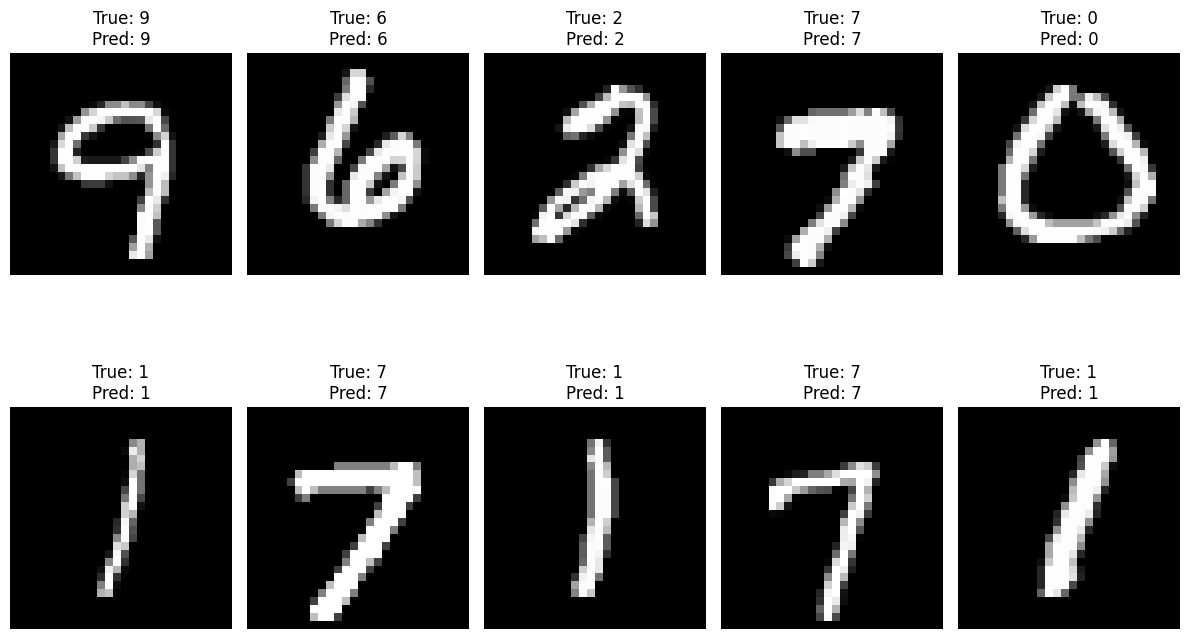

In [5]:
# Visualization predict result
def show_random_predictions(model, X, y, num_samples=10):
    indices = np.random.choice(X.shape[0], num_samples, replace=False)  
    X_samples = X[indices]
    y_true = np.argmax(y[indices], axis=1)  
    y_pred = model.predict(X_samples)      

    # 可视化
    plt.figure(figsize=(12, 8))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_samples[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_true[i]}\nPred: {y_pred[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
show_random_predictions(nn, x_test, y_test, num_samples=10)